# Import packages

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Read metadata from NOAA OISST v2.1 from ERDDAP

In [2]:
#url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/ncdcOisst21Agg'
#url = 'https://www.ncei.noaa.gov/erddap/griddap/ncdc_oisst_v2_avhrr_by_time_zlev_lat_lon'
#url = 'https://155.206.139.160/erddap/griddap/noaa_psl_2d74_d418_a6fb'
#url = "https://coastwatch.pfeg.noaa.gov/erddap/griddap/jplMURSST41"
url = 'https://comet.nefsc.noaa.gov/erddap/griddap/noaa_psl_2d74_d418_a6fb' # Sea Surface Tempearture, NOAA/NCEI Optimum Interpolation SST (OISST) AVHRR-only Analysis (V2.1), Global 0.25°, Monthly 1981-present
ds = xr.open_dataset(url)
print(f"Size in GB: {ds.nbytes / 1e9:.2f} GB")
ds.sizes
ds

Size in GB: 2.17 GB


<xarray.Dataset> Size: 2GB
Dimensions:    (time: 524, latitude: 720, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-04-01
  * latitude   (latitude) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 6kB 0.125 0.375 0.625 ... 359.4 359.6 359.9
Data variables:
    sst        (time, latitude, longitude) float32 2GB ...
Attributes: (12/35)
    cdm_data_type:              Grid
    comment:                    Reynolds, et al.(2007) Daily High-Resolution-...
    Conventions:                CF-1.10, COARDS, ACDD-1.3
    creator_name:               NOAA/National Centers for Environmental Infor...
    creator_type:               group
    creator_url:                https://www.noaa.gov/
    ...                         ...
    testOutOfDate:              now-114days
    time_coverage_end:          2025-04-01T00:00:00Z
    time_coverage_start:        1981-09-01T00:00:00Z
    title:                      Sea Surface Tempearture, NOAA/NCEI Optimum In...
    version:                    Version 2.1
    Westernmost_Easting:        0.125

In [3]:
# rename ds
ds1 = ds

## Change longitudes to -180 to +180 so that you can plot across the prime meridian

### Plot one time slice to confirm that longitudes have been converted

See https://docs.xarray.dev/en/stable/generated/xarray.Dataset.assign_coords.html

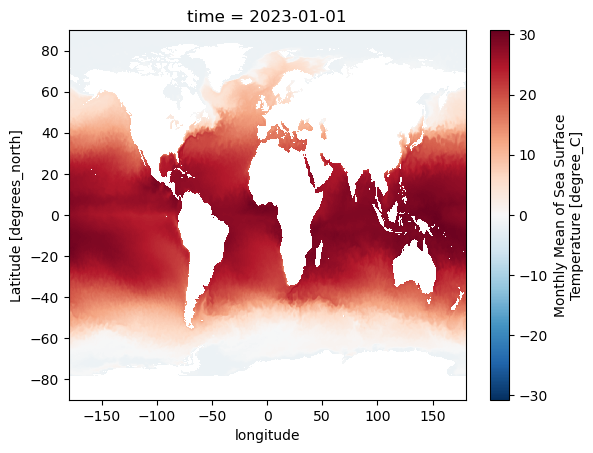

In [4]:
ds2 = ds1.assign_coords(longitude = ((ds1.longitude + 180) % 360) - 180)
ds2 = ds2.sortby('longitude') # don't forget to sort!!
ds2['sst'].sel(time = "2023-01").plot()

## Set lat/lon boundaries, colormap, dates, deployment sites

In [5]:
colormap = 'RdBu_r'

date_range = ("1982-01-01", "2024-12-01")

lat_min = -10
lat_max = 20
lon_min = -30
lon_max = 15

#create smaller box for the local region
lat_min_sm = 12.6
lat_max_sm = 16.6
lon_min_sm = -19.6
lon_max_sm = -15.6

#input deployment locations
#site 1 deployment 1
deployment0101_lat = 14.616
deployment0101_lon = -17.631

#site 1, deployment 2
deployment0102_lat =14.615
deployment0102_lon =-17.630

#site 1, deployment 3
deployment0103_lat = 14.618
deployment0103_lon = -17.628

#site 1, deployment 4
deployment0104_lat = 14.618
deployment0104_lon = -17.628

#site 2, deployments 1 & 2
deployment020102_lat = 14.742
deployment020102_lon = -17.636

#region around recorders
rec_lat_min = 12 
rec_lat_max = 17
rec_lon_min = -12
rec_lon_max = -20

#CVI coords
CVI_lat_min = 14
CVI_lat_max = 18
CVI_lon_min = -27
CVI_lon_max = -21

#GoG Gulf of Guinea
GoG_lat_min = -10
GoG_lat_max = 7
GoG_lon_min = 6
GoG_lon_max = 15

## To reduce size & time, create spatial subset dataset

In [6]:
dsBigBox = ds2['sst'].sel(latitude=slice(lat_min, lat_max), 
                longitude=slice(lon_min, lon_max))
dsBigBox

<xarray.DataArray 'sst' (time: 524, latitude: 120, longitude: 180)> Size: 45MB
[11318400 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-04-01
  * latitude   (latitude) float32 480B -9.875 -9.625 -9.375 ... 19.62 19.88
  * longitude  (longitude) float32 720B -29.88 -29.62 -29.38 ... 14.62 14.88
Attributes: (12/13)
    actual_range:     [-1.8  32.14]
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    ioos_category:    Temperature
    level_desc:       Surface
    long_name:        Monthly Mean of Sea Surface Temperature
    ...               ...
    precision:        2.0
    standard_name:    sea_surface_temperature
    statistic:        Monthly Mean
    units:            degree_C
    valid_range:      [-3. 45.]
    var_desc:         Sea Surface Temperature

## Visualize the subset region

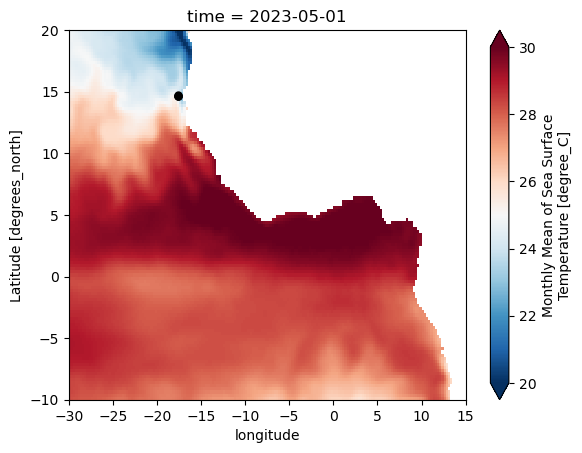

In [7]:
fig, ax = plt.subplots()
dsBigBox.sel(time = "2023-05").plot(cmap = colormap, vmin = 20, vmax = 30)
ax.plot(deployment0101_lon, deployment0101_lat, marker='o', color='k', markersize=5)
ax.plot(deployment0102_lon, deployment0102_lat, marker='o', color='k', markersize=5)
ax.plot(deployment0103_lon, deployment0103_lat, marker='o', color='k', markersize=5)
ax.plot(deployment020102_lon, deployment020102_lat, marker='o', color='k', markersize=5)

## Compute spatialy explicit monthly climatology 'clim_spat'

In [8]:
clim_spat = dsBigBox.groupby("time.month").mean("time")
#clim_spat

## Monthly climatological SST - 1982-2024

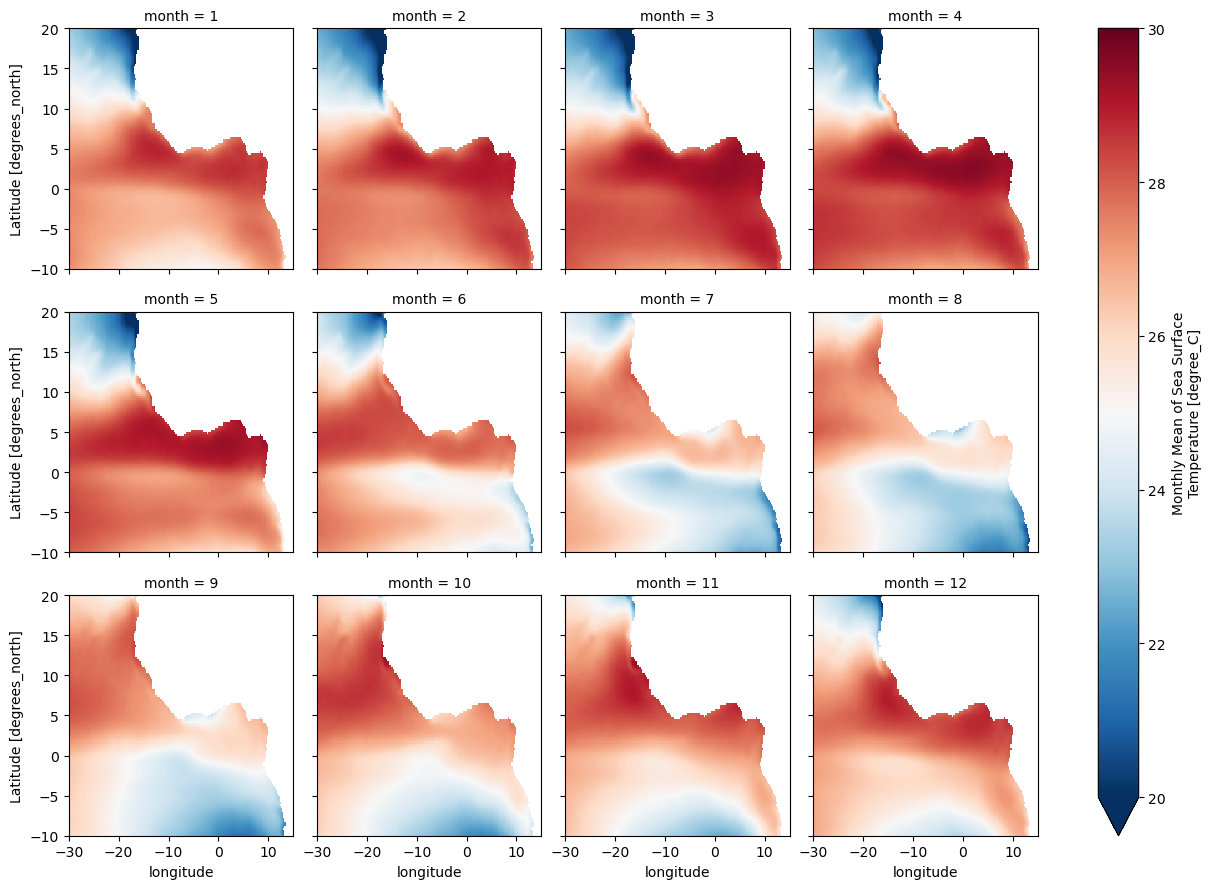

In [9]:
clim_spat.plot(x='longitude', y='latitude', col="month", col_wrap=4, cmap = colormap, vmin = 20, vmax = 30);

## From clim_spat, compute monthly SST anomalies for all months 1982-2024

In [10]:
anom_spat = dsBigBox.groupby("time.month") - clim_spat
#anom_spat

## For years 2015 - 2024, plot monthly temperature anomalies

In [11]:
yrs = (["2015-01-01","2015-12-01"],
      ["2016-01-01","2016-12-01"],
      ["2017-01-01","2017-12-01"],
      ["2018-01-01","2018-12-01"],
      ["2019-01-01","2019-12-01"],
      ["2020-01-01","2020-12-01"],
      ["2021-01-01","2021-12-01"],
      ["2022-01-01","2022-12-01"],
      ["2023-01-01","2023-12-01"],
      ["2024-01-01","2024-12-01"])

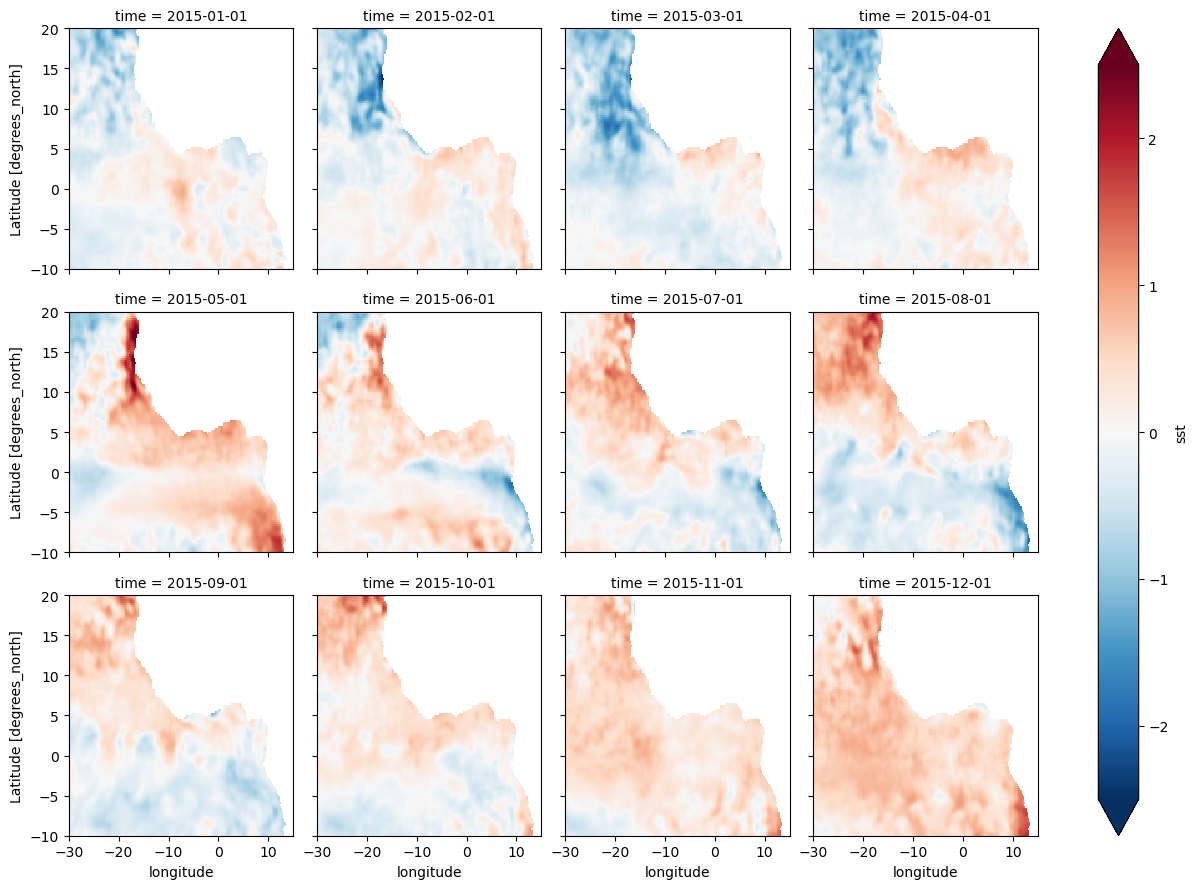

In [12]:
anom_spat.sel(time = slice(yrs[0][0],yrs[0][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

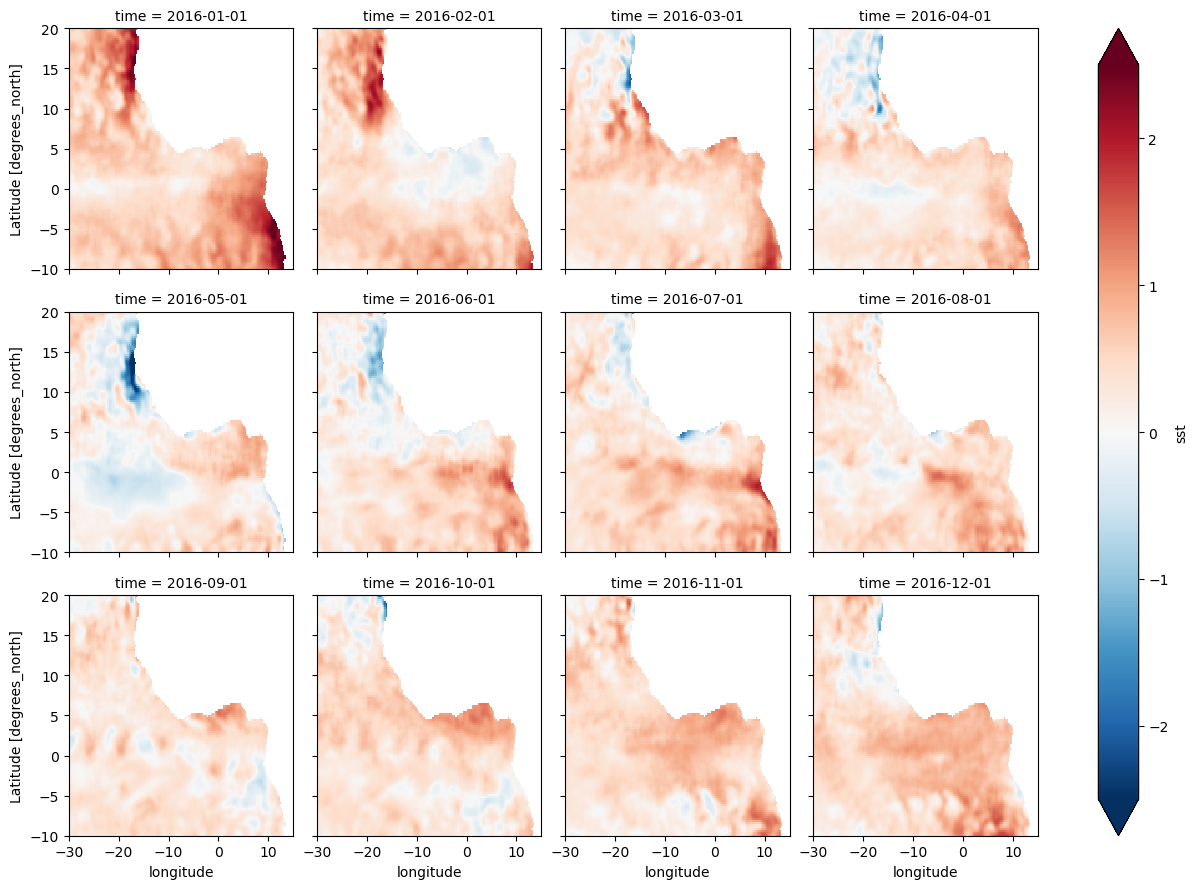

In [13]:
anom_spat.sel(time = slice(yrs[1][0],yrs[1][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

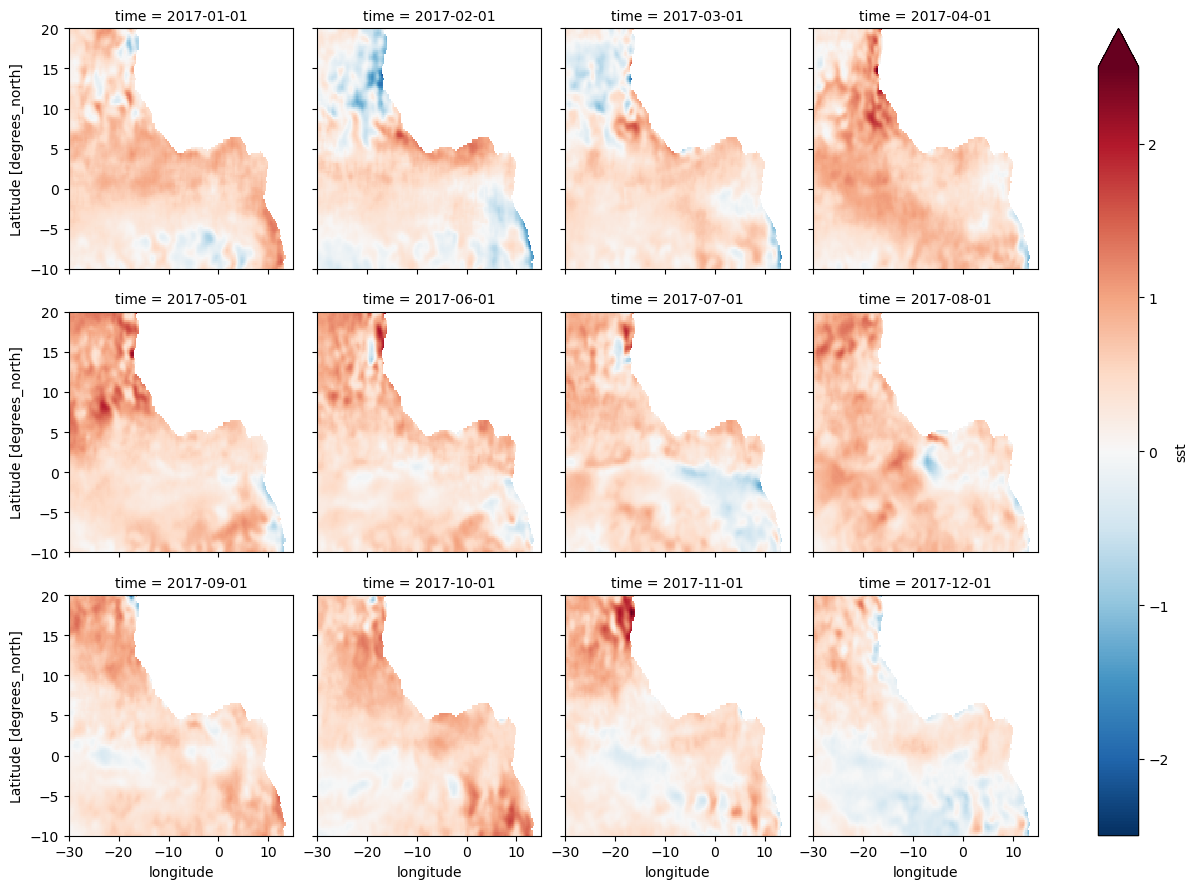

In [14]:
anom_spat.sel(time = slice(yrs[2][0],yrs[2][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

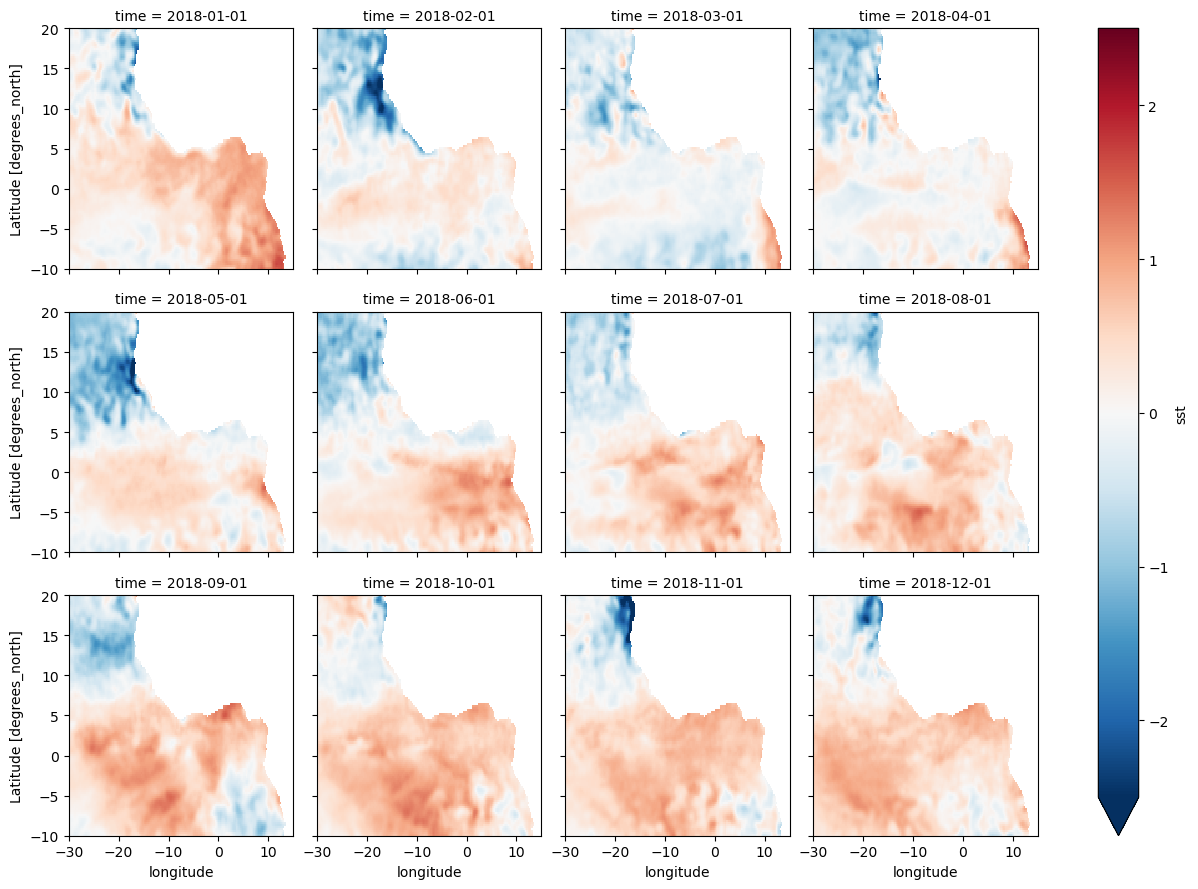

In [15]:
anom_spat.sel(time = slice(yrs[3][0],yrs[3][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

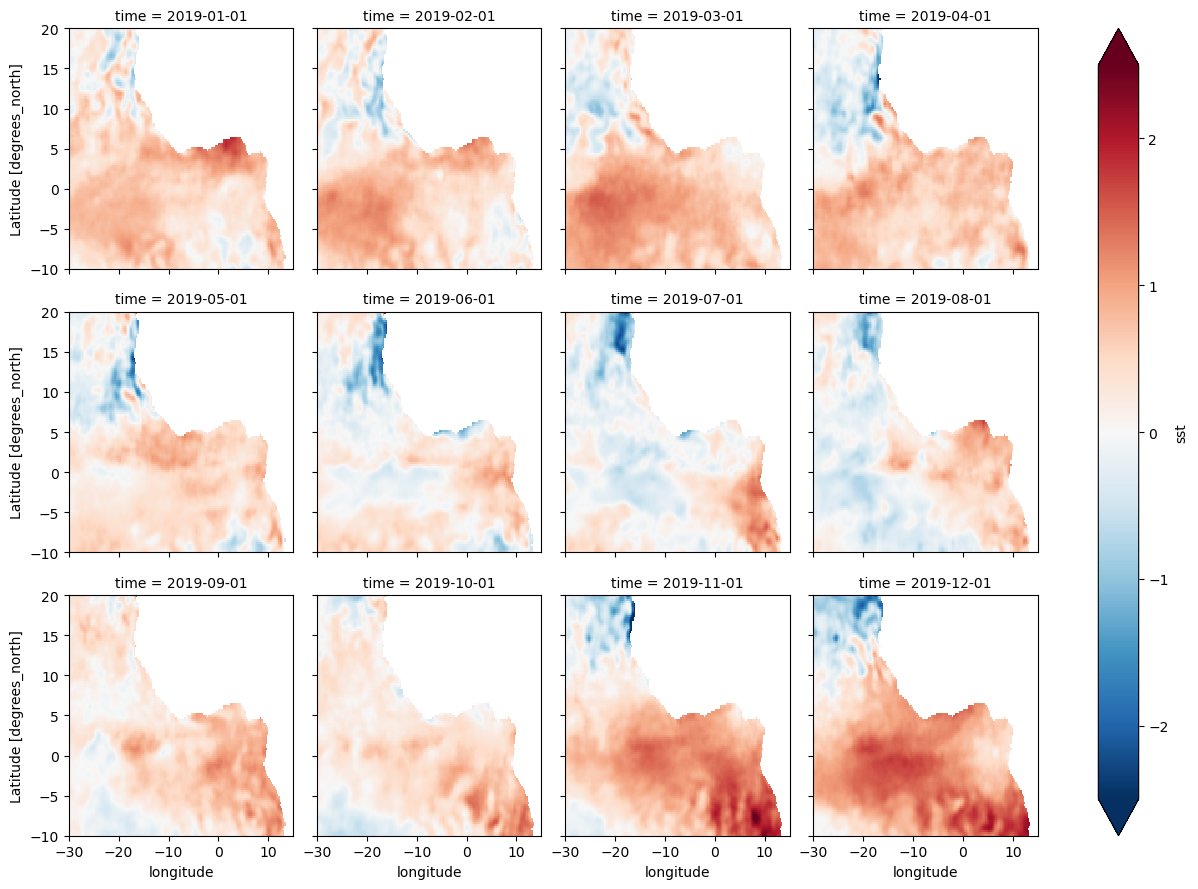

In [16]:
anom_spat.sel(time = slice(yrs[4][0],yrs[4][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

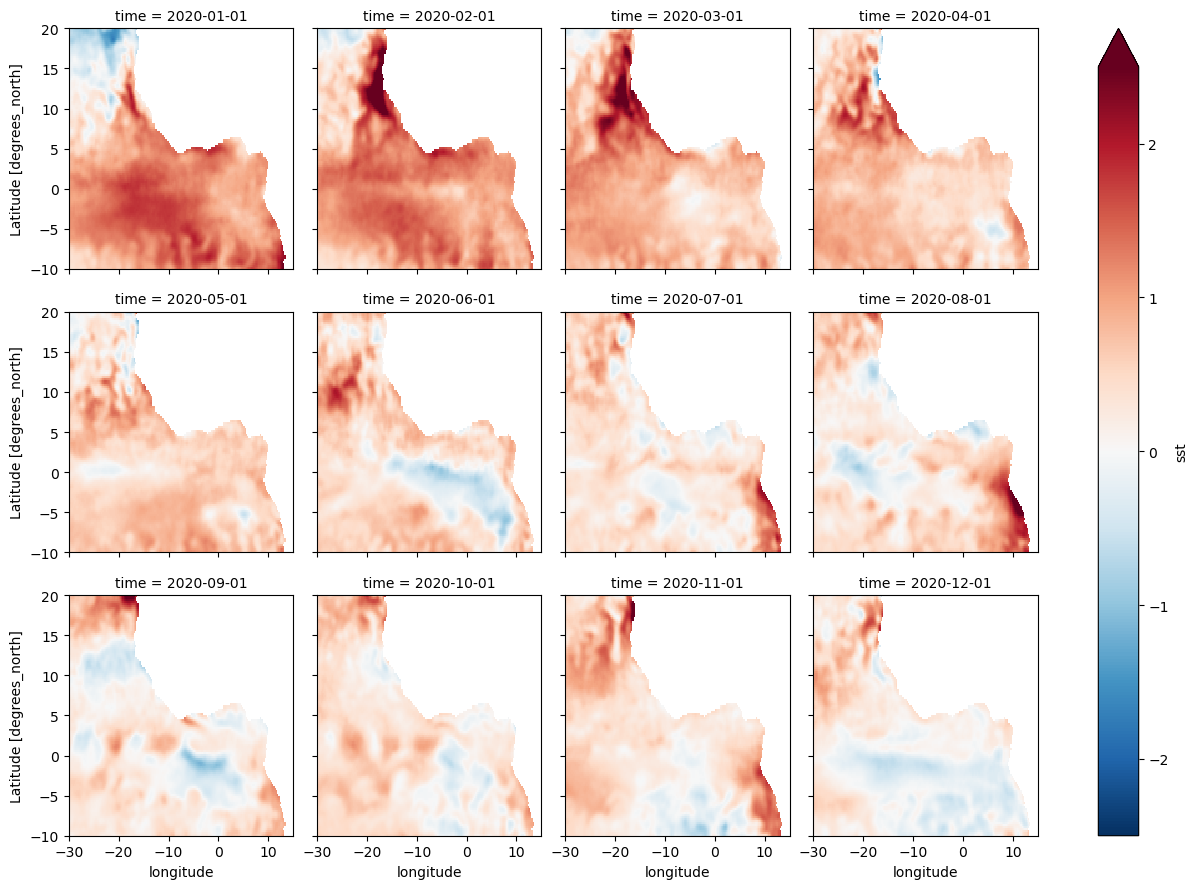

In [17]:
anom_spat.sel(time = slice(yrs[5][0],yrs[5][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

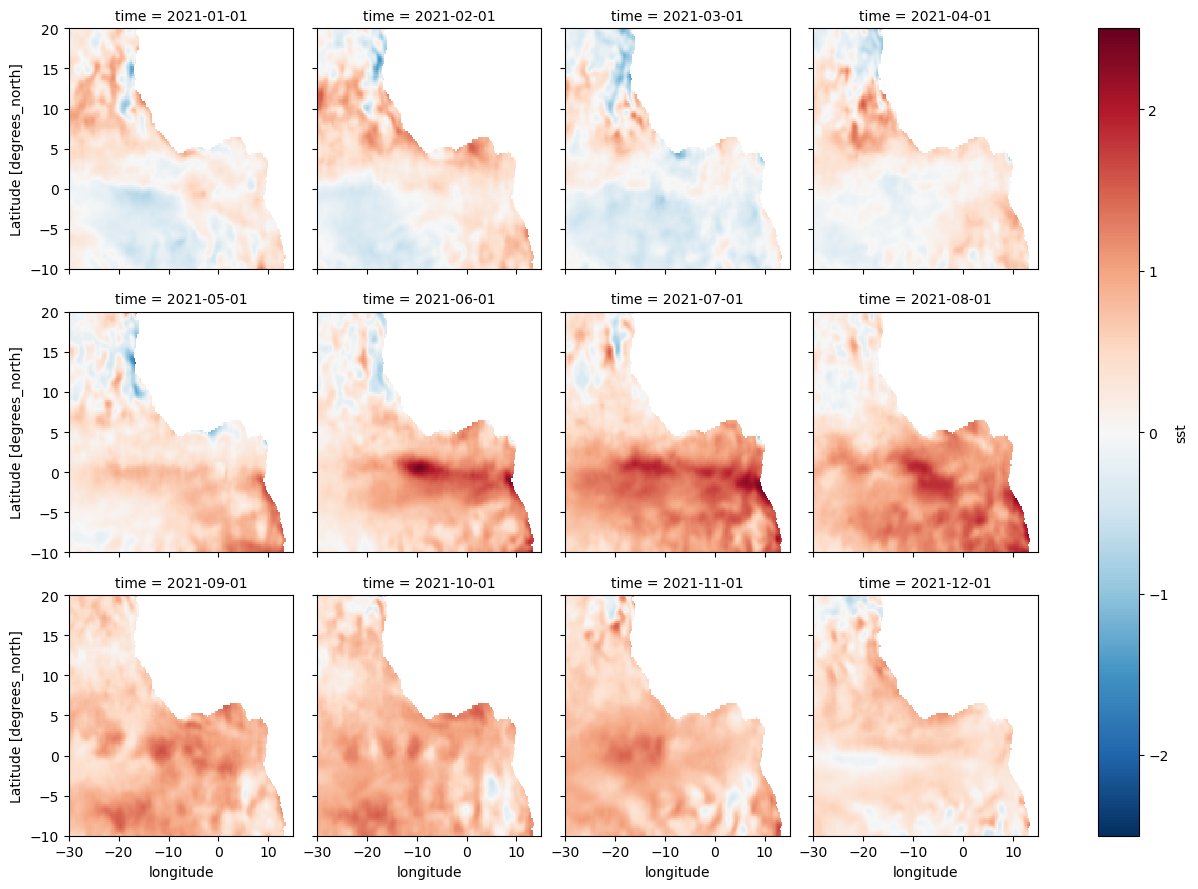

In [18]:
anom_spat.sel(time = slice(yrs[6][0],yrs[6][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

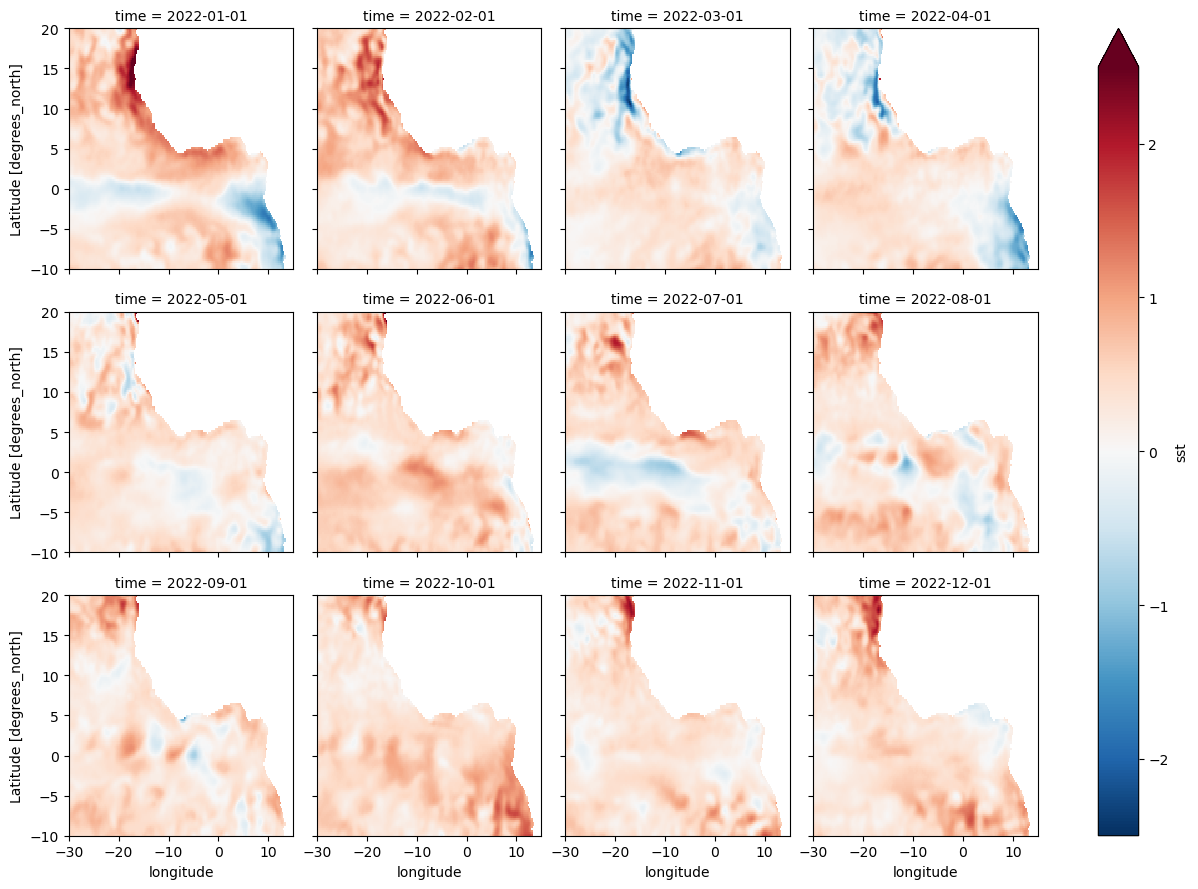

In [19]:
anom_spat.sel(time = slice(yrs[7][0],yrs[7][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

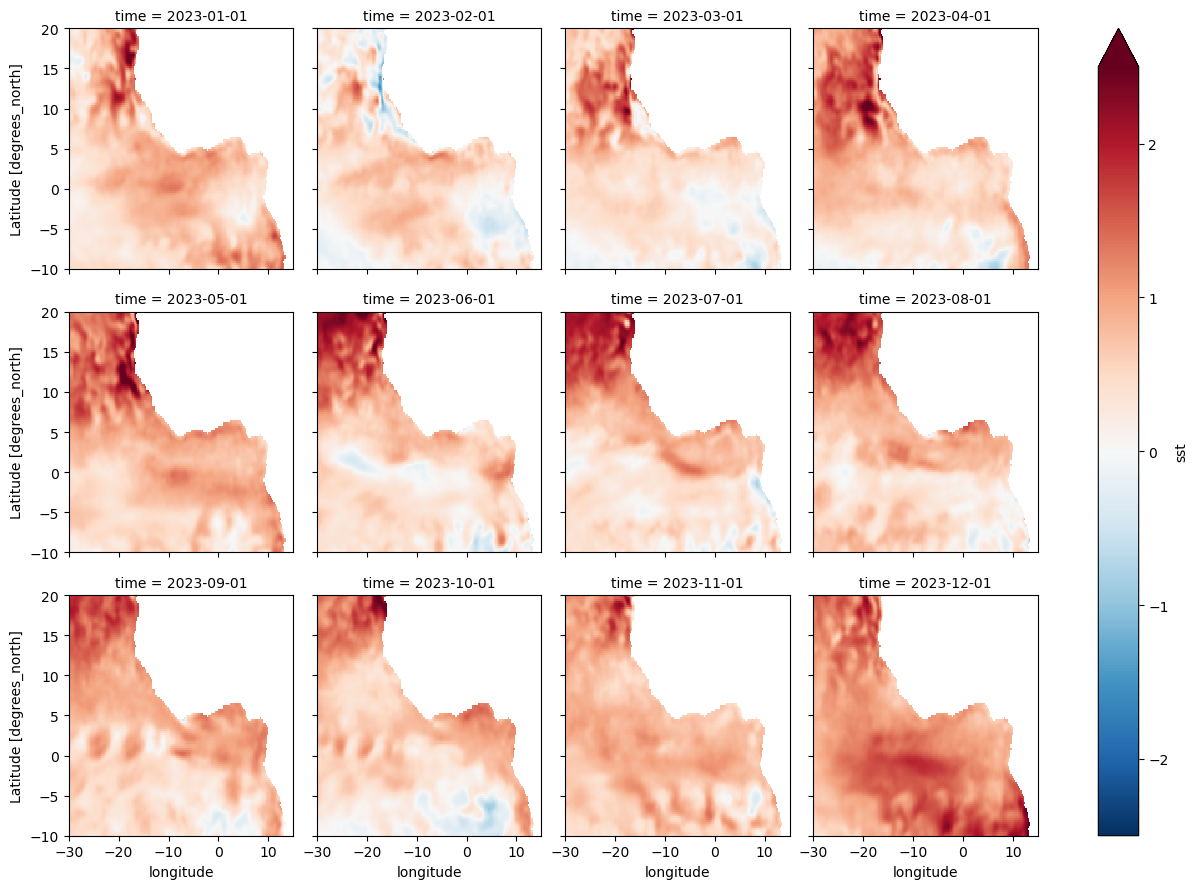

In [20]:
anom_spat.sel(time = slice(yrs[8][0],yrs[8][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

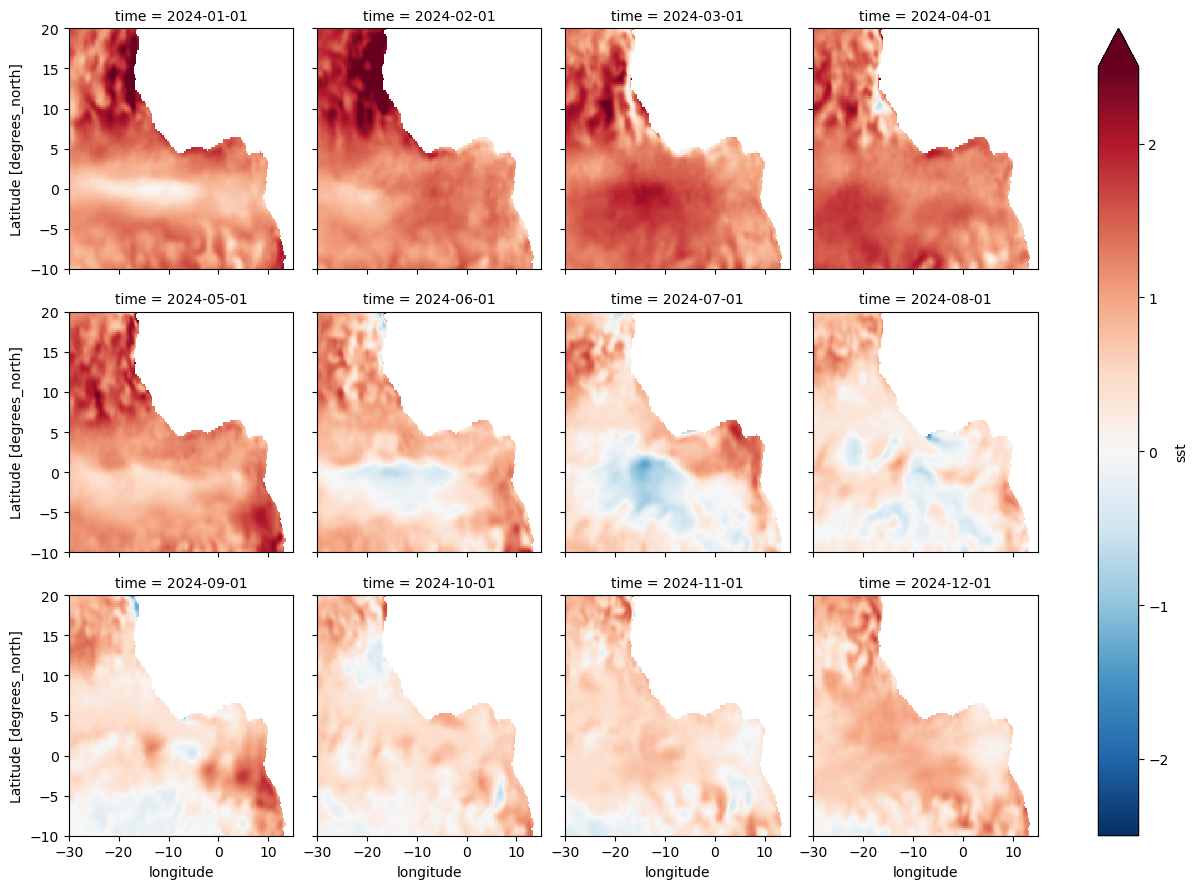

In [21]:
anom_spat.sel(time = slice(yrs[9][0],yrs[9][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, cmap = colormap, vmin = -2.5, vmax = 2.5)

## - - - - For years 2015 - 2024, plot monthly 'absolute' temperature in deg C - - - - 

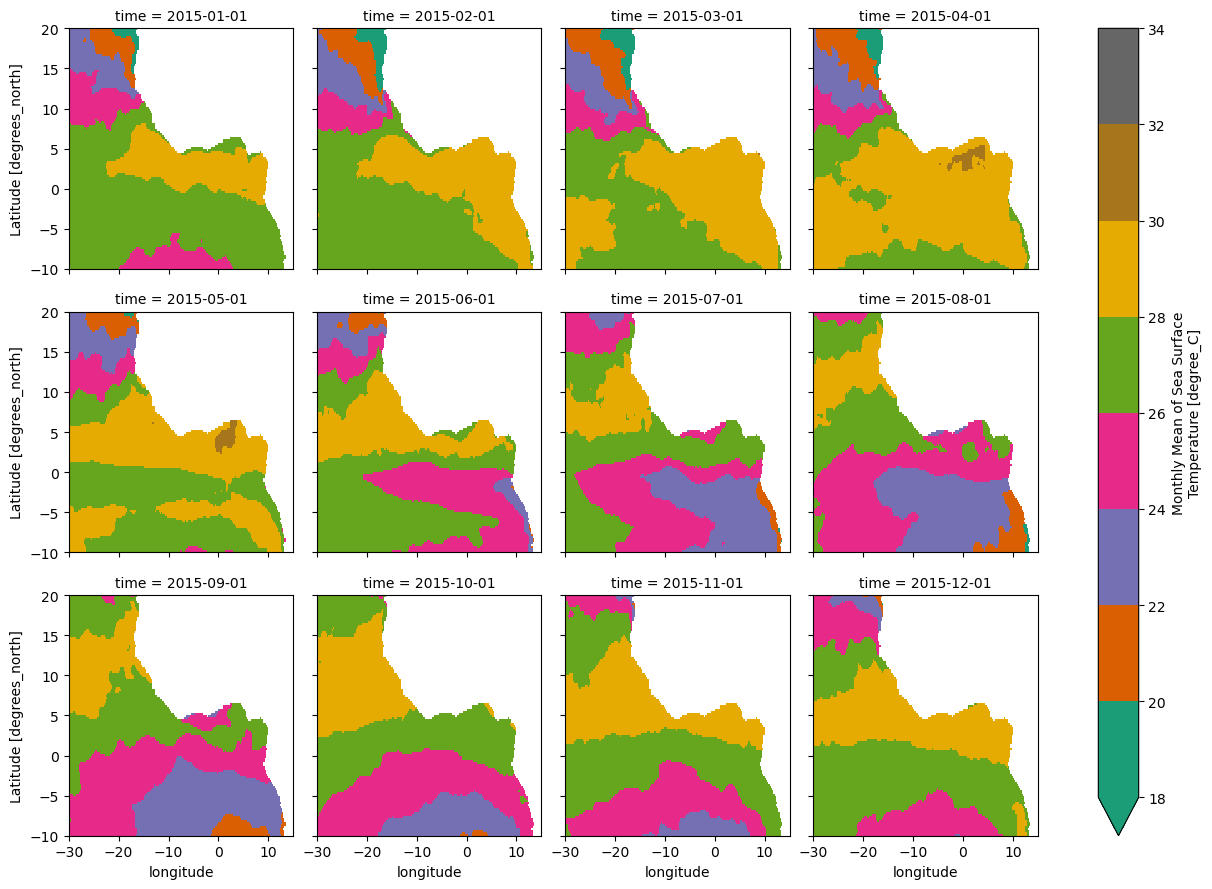

In [22]:
dsBigBox.sel(time = slice(yrs[0][0],yrs[0][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, vmin = 18, vmax = 34, cmap = 'Dark2')

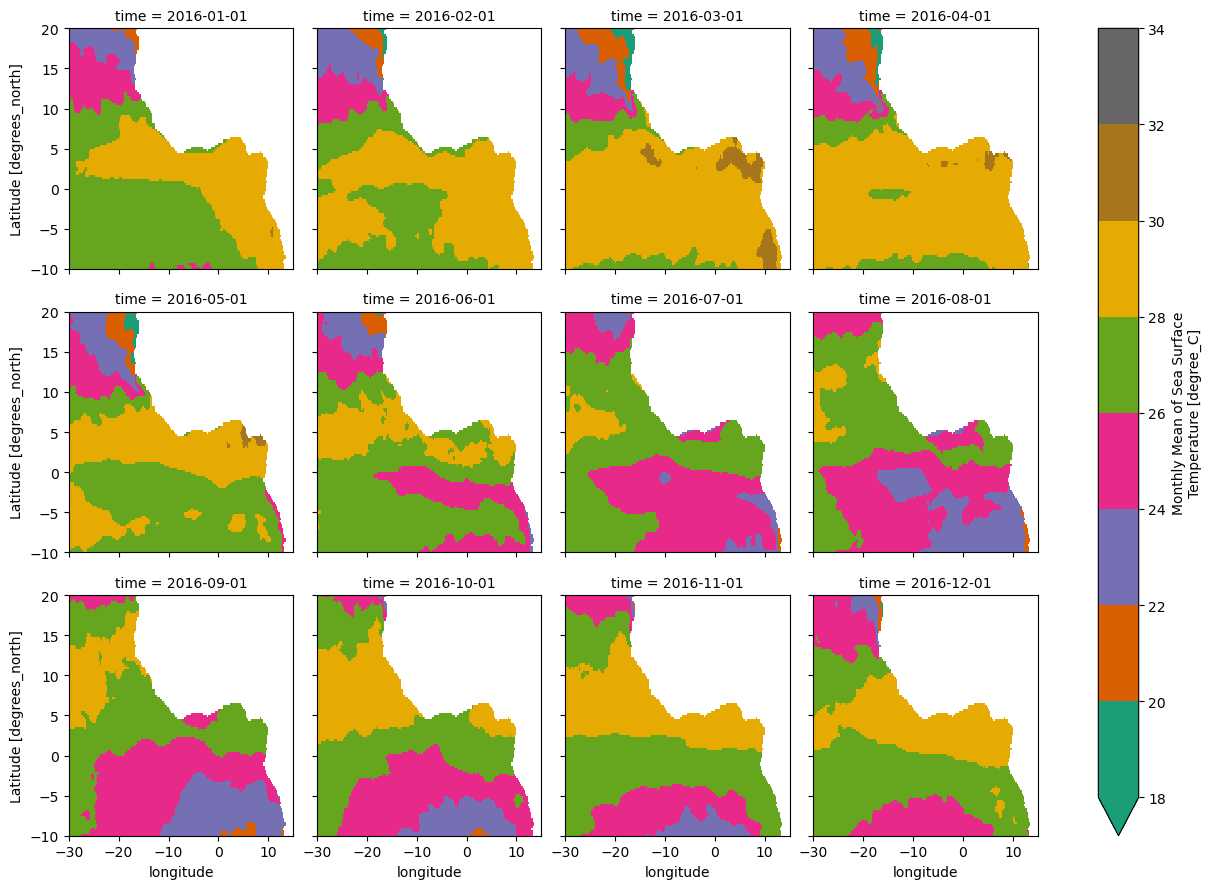

In [23]:
dsBigBox.sel(time = slice(yrs[1][0],yrs[1][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4,vmin = 18, vmax = 34, cmap = 'Dark2')

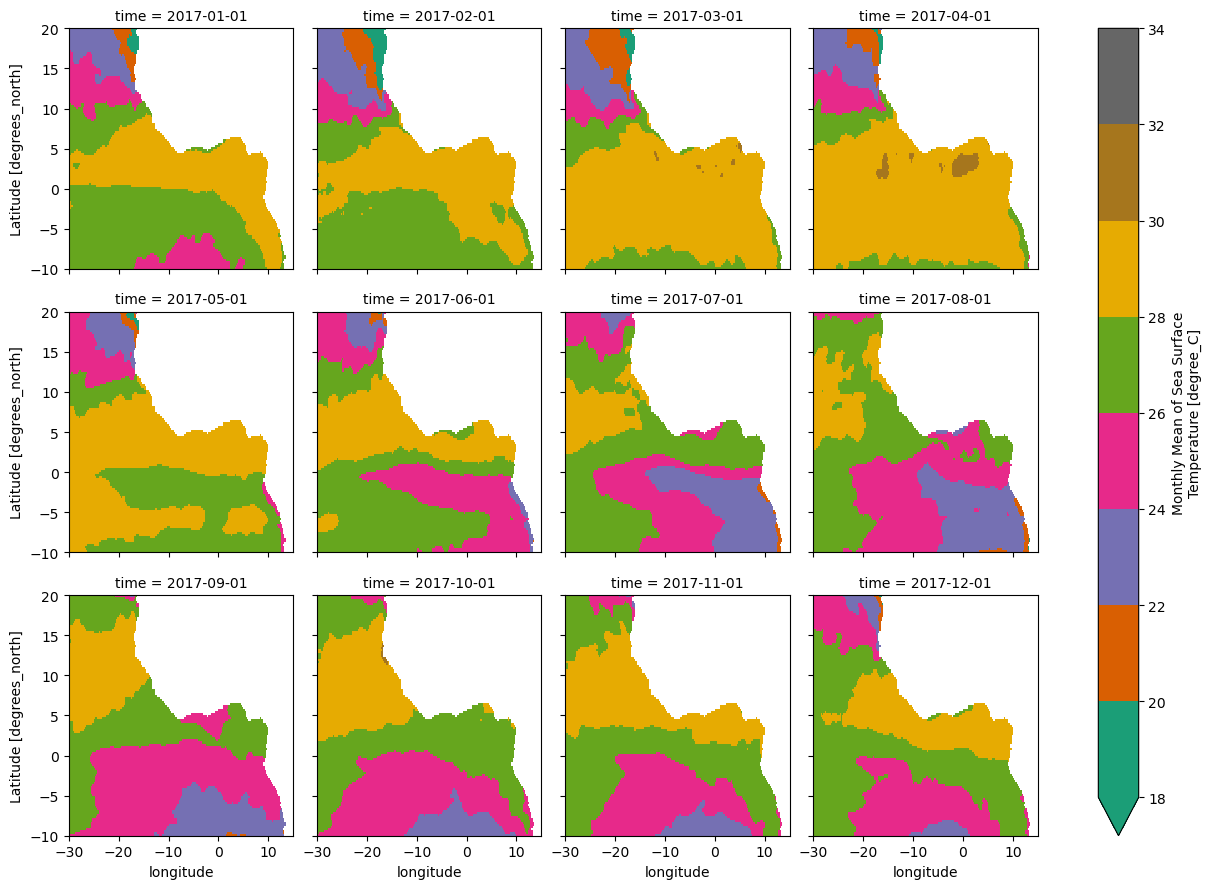

In [24]:
dsBigBox.sel(time = slice(yrs[2][0],yrs[2][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, vmin = 18, vmax = 34, cmap = 'Dark2')

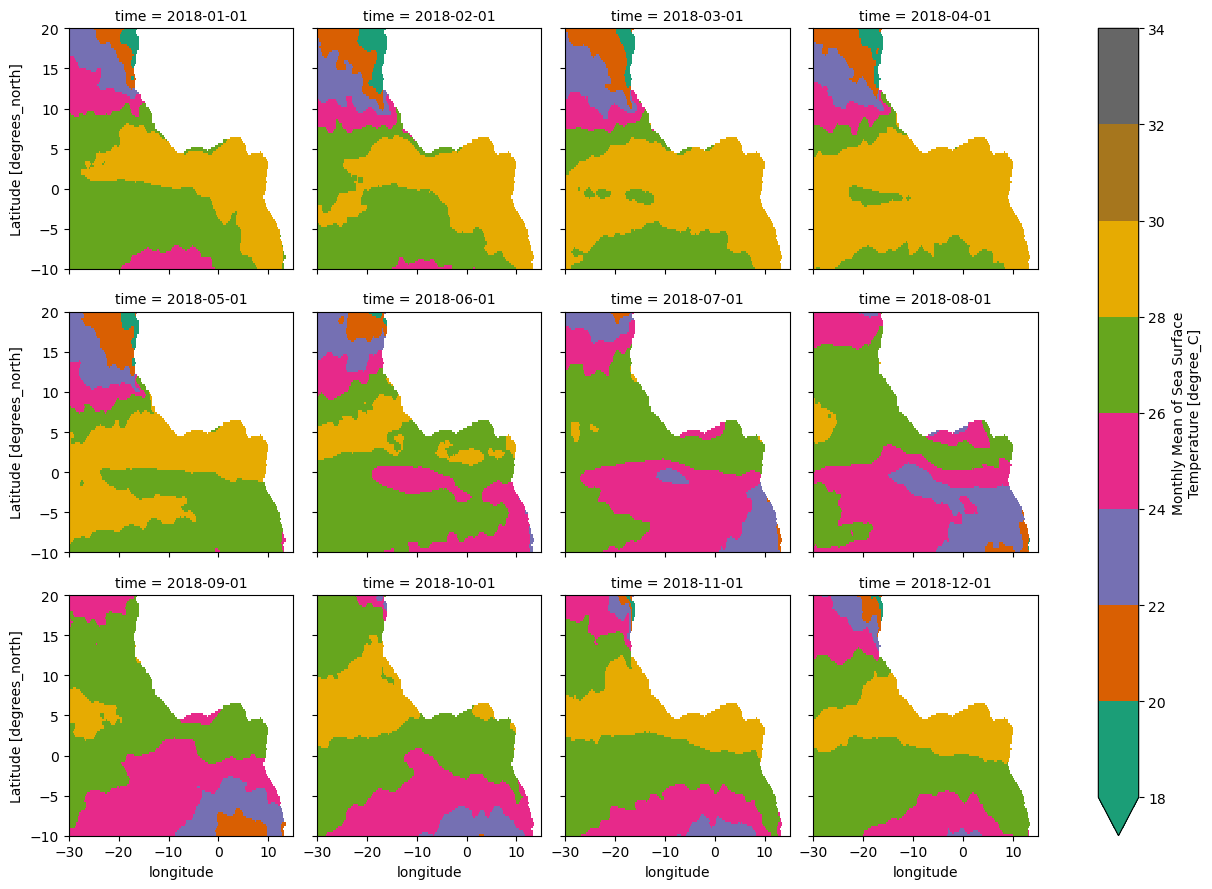

In [25]:
dsBigBox.sel(time = slice(yrs[3][0],yrs[3][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, vmin = 18, vmax = 34, cmap = 'Dark2')

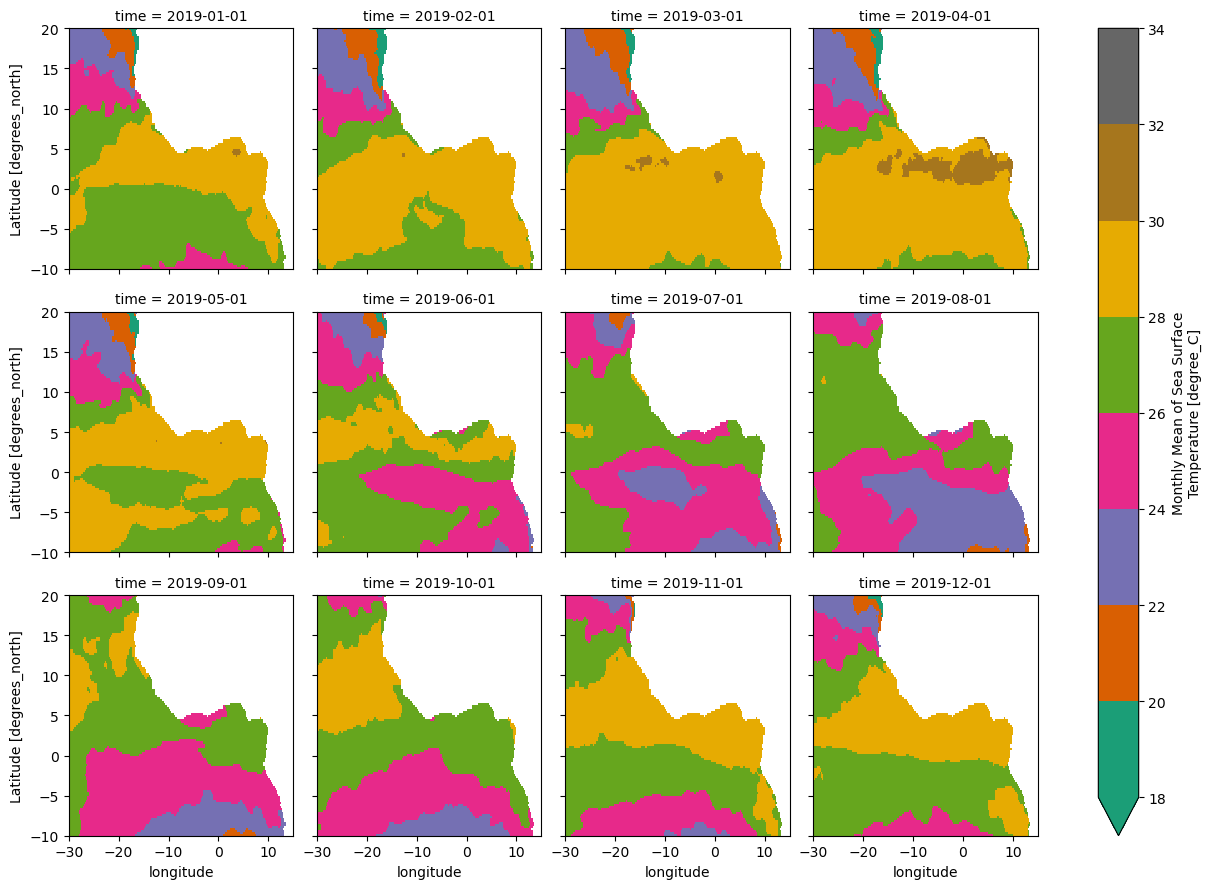

In [26]:
dsBigBox.sel(time = slice(yrs[4][0],yrs[4][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, vmin = 18, vmax = 34, cmap = 'Dark2')

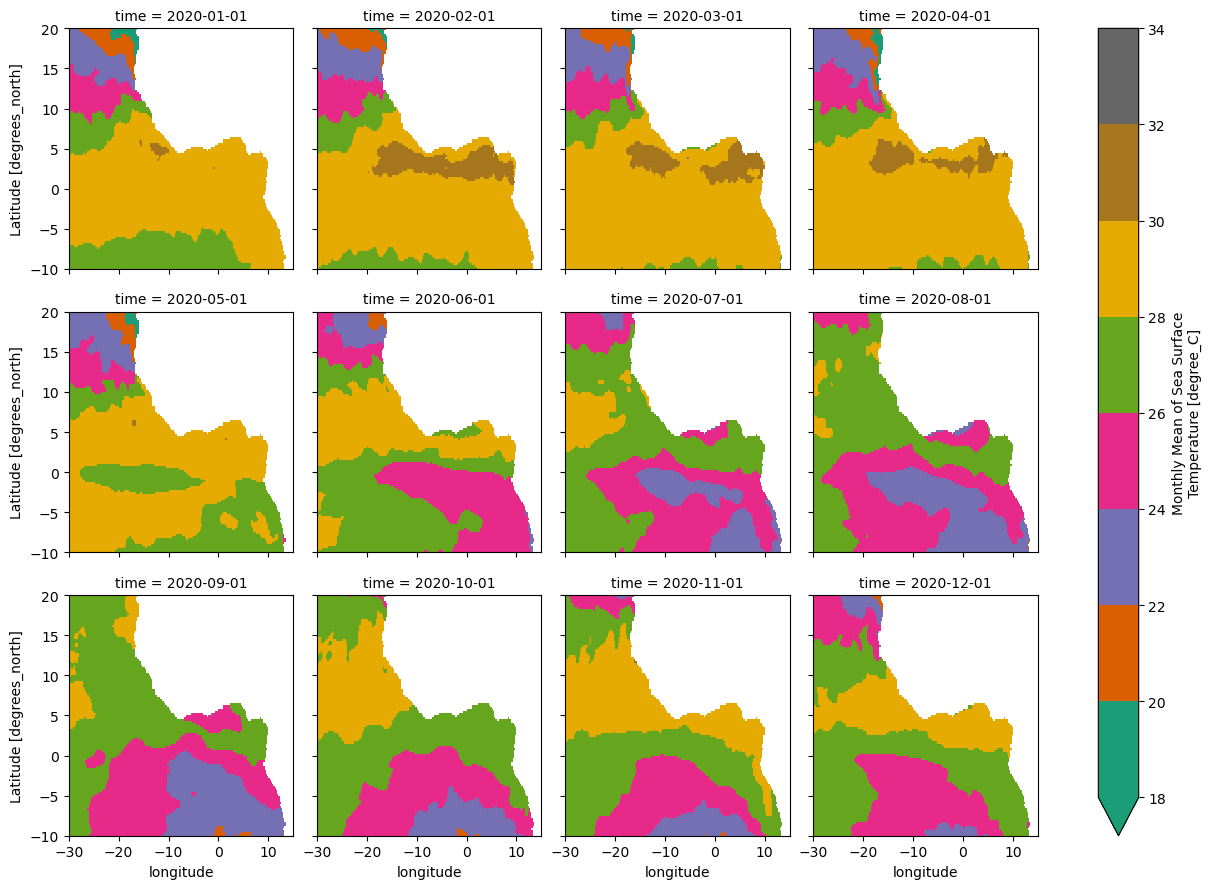

In [27]:
dsBigBox.sel(time = slice(yrs[5][0],yrs[5][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, vmin = 18, vmax = 34, cmap = 'Dark2')

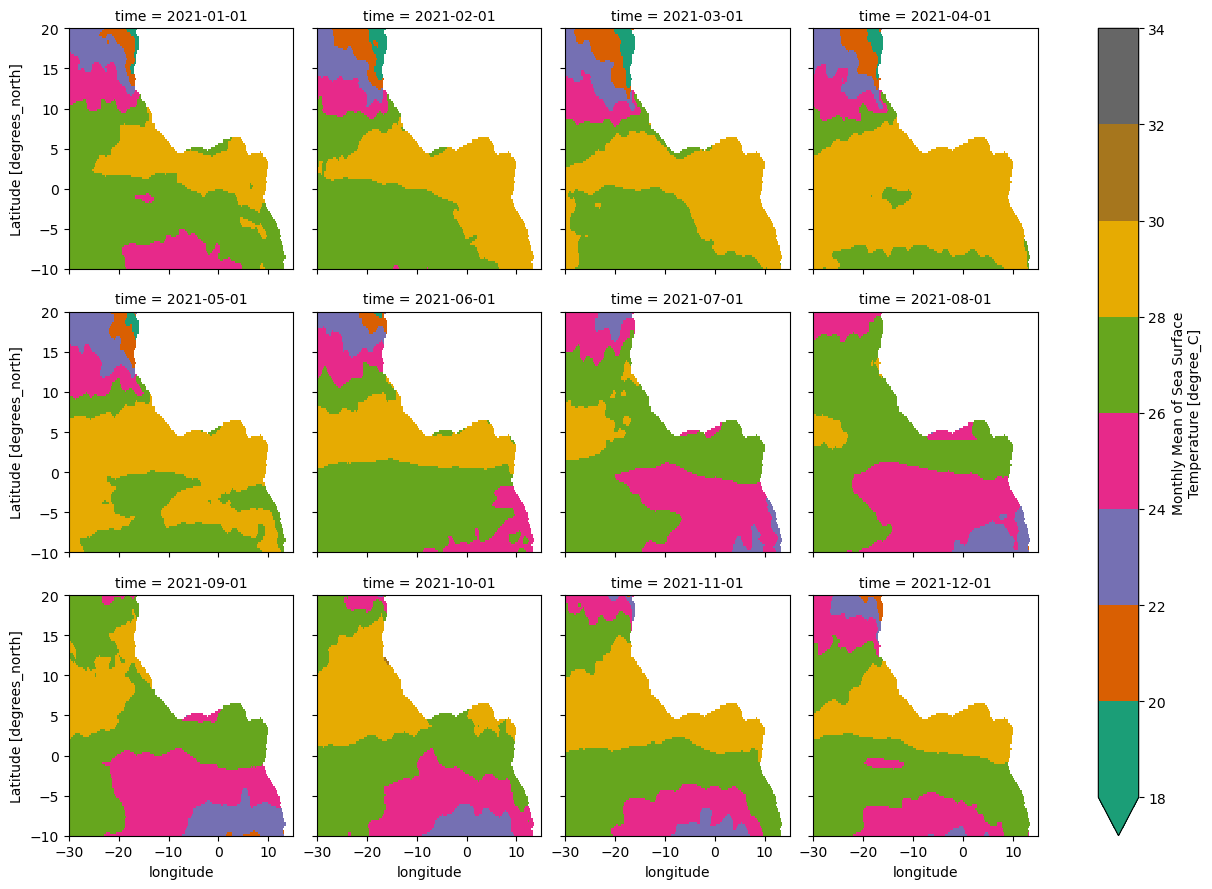

In [28]:
dsBigBox.sel(time = slice(yrs[6][0],yrs[6][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, vmin = 18, vmax = 34, cmap = 'Dark2')

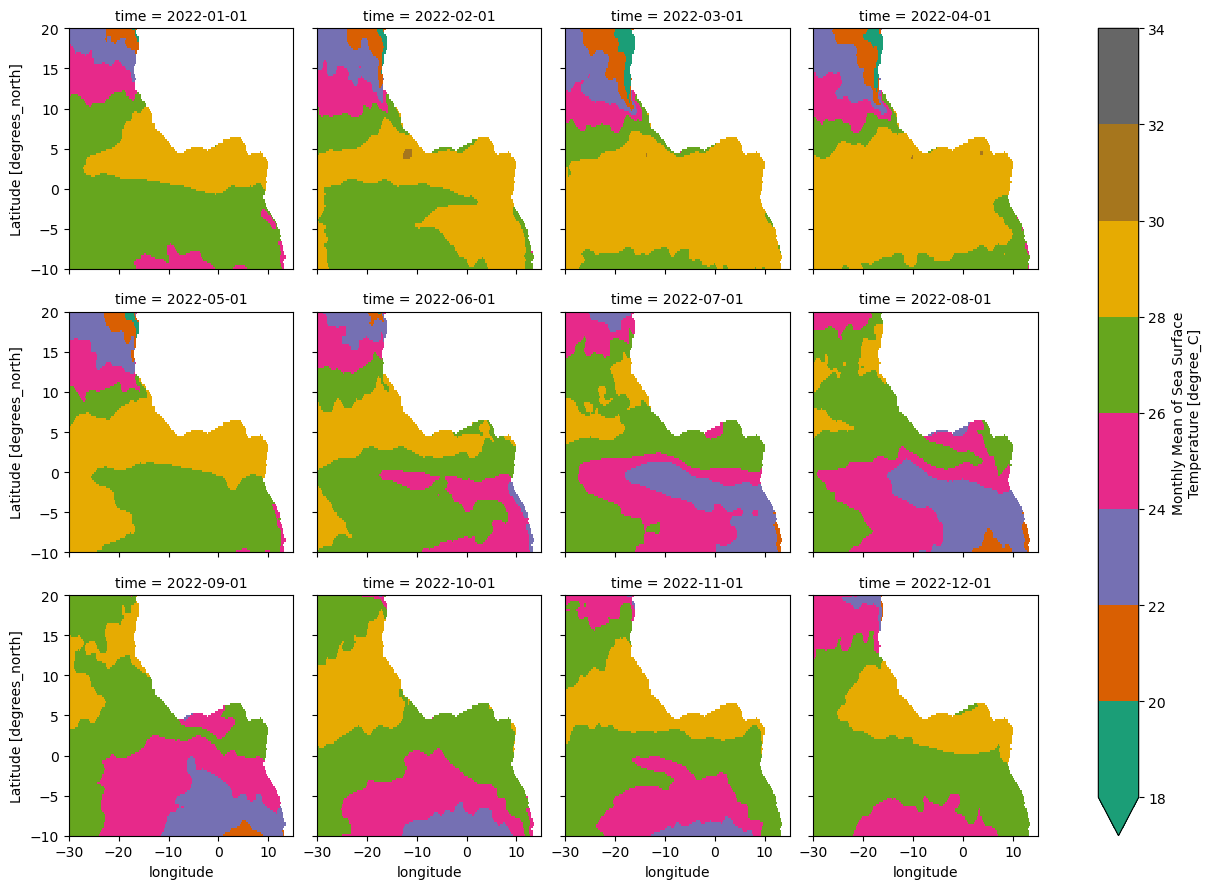

In [29]:
dsBigBox.sel(time = slice(yrs[7][0],yrs[7][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, vmin = 18, vmax = 34, cmap = 'Dark2')

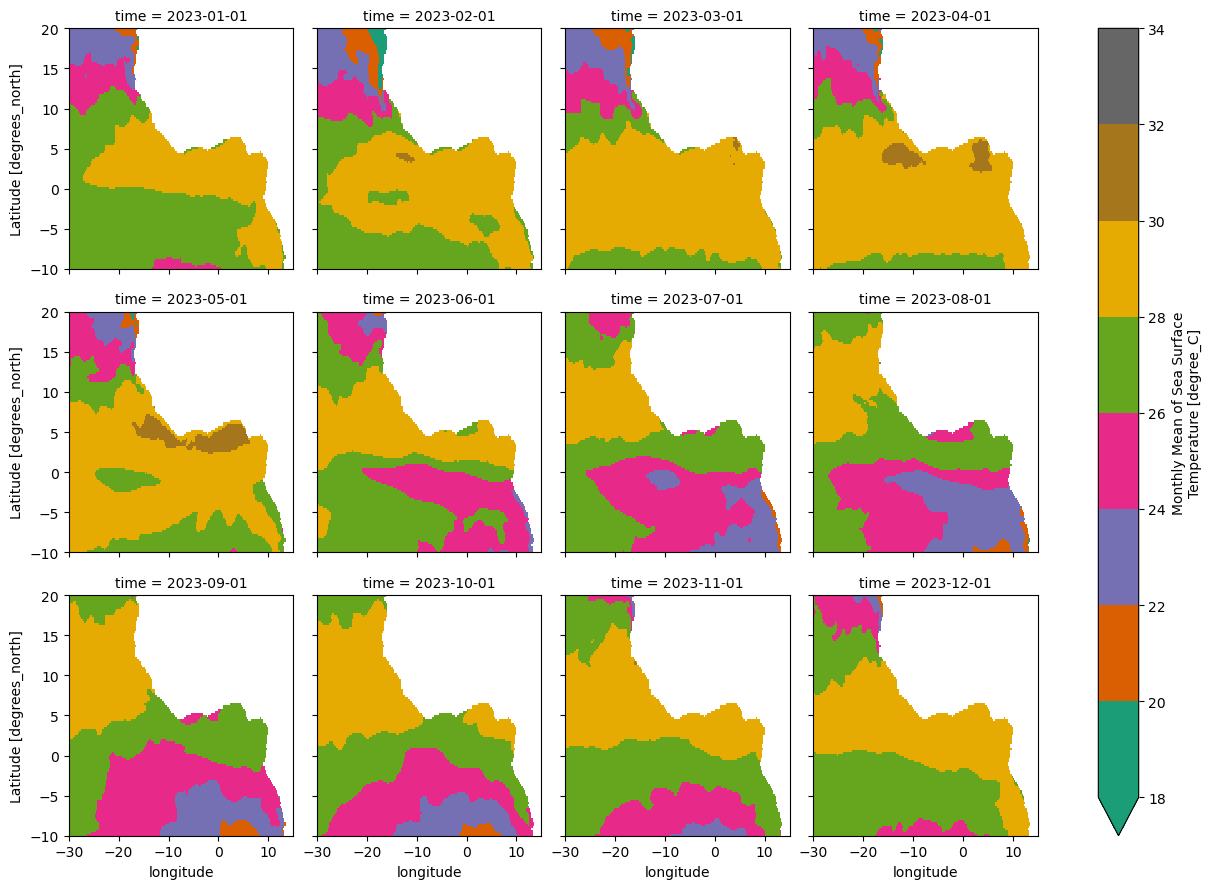

In [30]:
dsBigBox.sel(time = slice(yrs[8][0],yrs[8][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, vmin = 18, vmax = 34, cmap = 'Dark2')

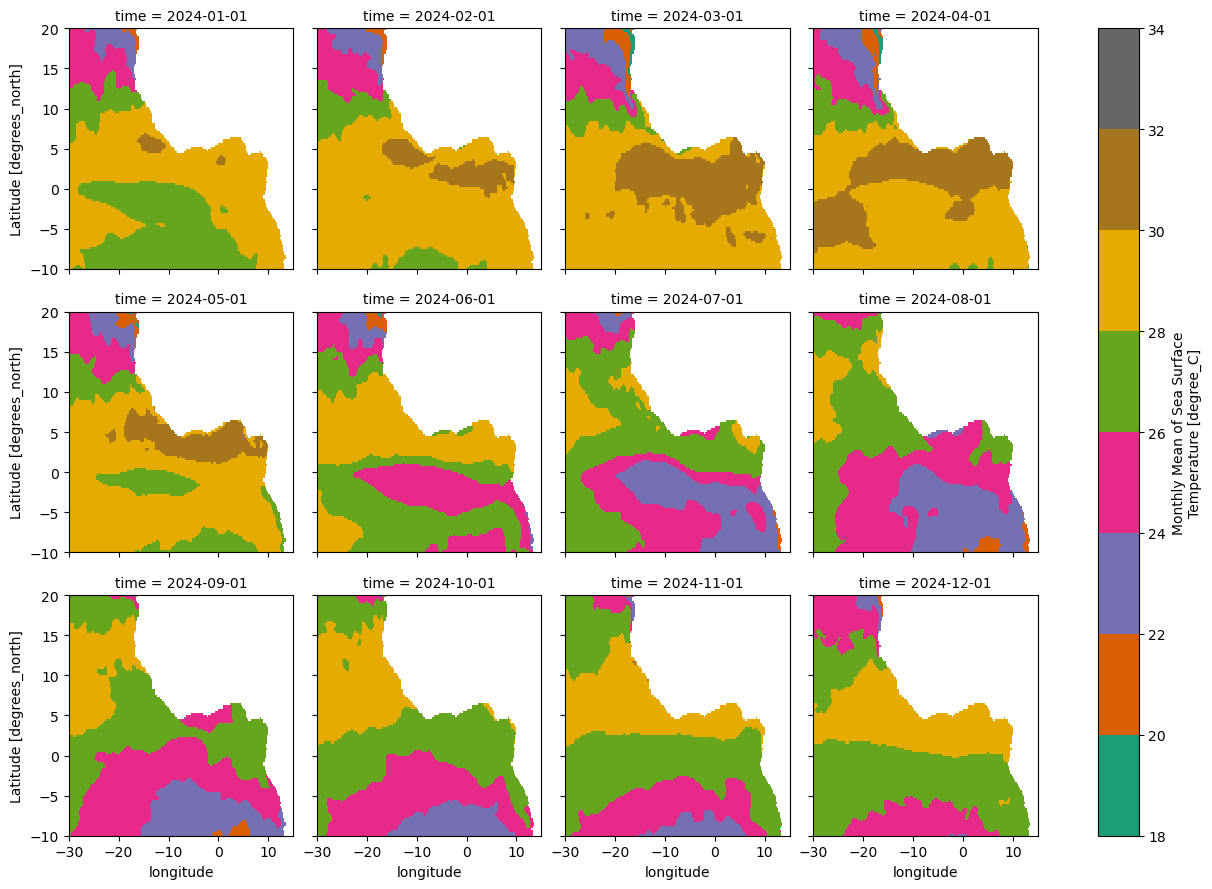

In [31]:
dsBigBox.sel(time = slice(yrs[9][0],yrs[9][1])).plot(x = "longitude", y = "latitude", col = "time", col_wrap=4, vmin = 18, vmax = 34, cmap = 'Dark2')

## Timeseries of monthly climatological temperatures in deg C

### Note coolest temperatures in August due to so much southern hemisphere water in our domain

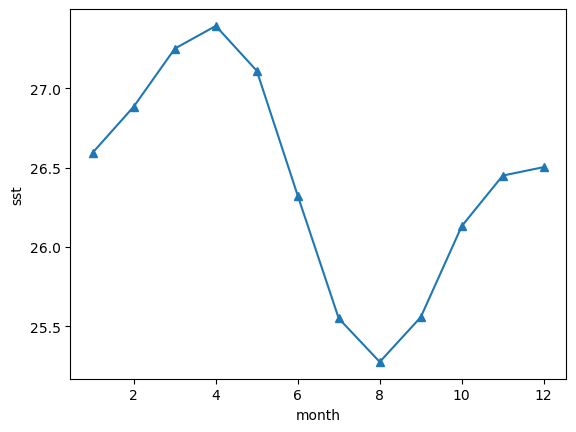

In [32]:
# plot monthly climatology. Note how different this looks due to including southern hemisphere
clim_spat.mean(dim = ['latitude','longitude']).plot(marker = "^")

## Timeseries of temperature in deg C

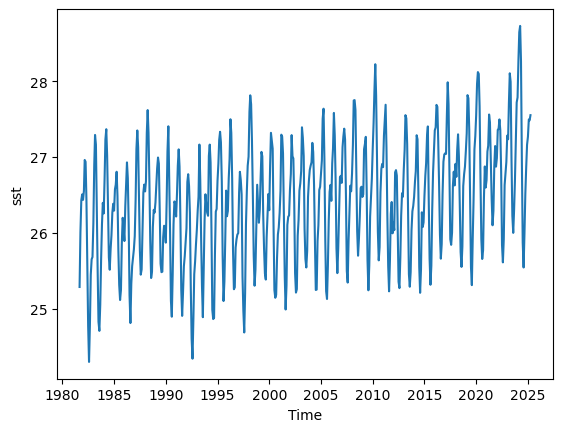

In [33]:
#average over all space against time (monthly means over the domain)
dsBigBox.mean(dim=['latitude', 'longitude']).plot();

## Calculate monthly anomaly means over space, and zero-line to show the mean

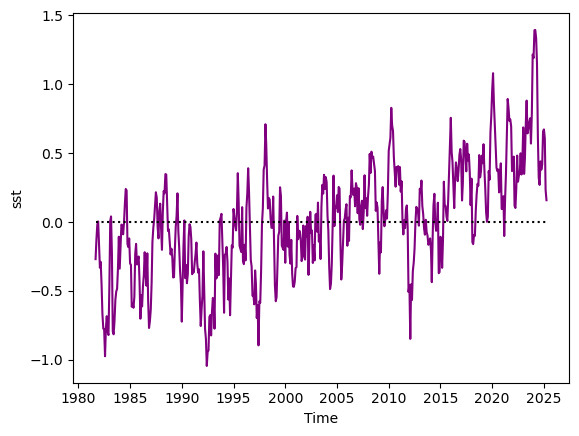

In [34]:
# plot full timeseries of monthly anomalies
month_anom_means = anom_spat.mean(dim = ['latitude','longitude'])
zero_line = month_anom_means*0

fig, ax = plt.subplots()
month_anom_means.plot(color="purple")
zero_line.plot(linestyle = ':', color = "k" )

## (zoom in) Calculate monthly anomaly means over space (2000-06 - 2023-05, and zero-line to show the mean

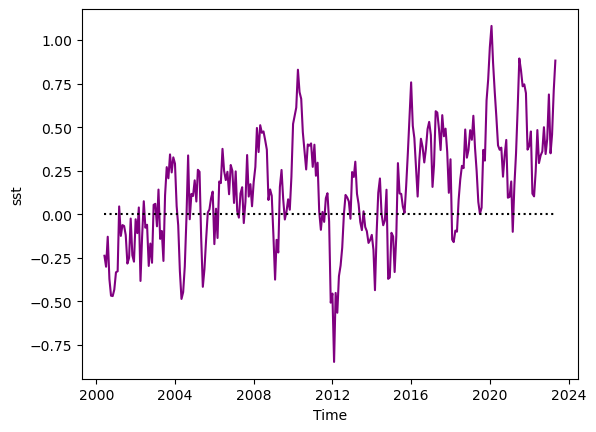

In [35]:
# plot sst anomalies just for the period of time when recorders were deployed
t1 = '2000-06-01'; t2 = '2023-05-01'

fig, ax = plt.subplots()
month_anom_means.sel(time = slice (t1, t2)).plot(color = "purple")
zero_line.sel(time = slice(t1,t2)).plot(color = "black", linestyle = ":")